## Inheritance Scope

When traversing an inheritance structure, the `inheritance_explorer` will walk any subclasses that are available within the scope of the python session. 

This means that the resulting graph can change depending on what packages you have imported! If you import packages that subclass the parent of interest, then you'll get all those cases as well. 

For example, if we map `collecitons.defaultdict`, we get a simple inheritance structure:

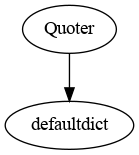

In [1]:
from inheritance_explorer import ClassGraphTree
from collections import defaultdict
cgt = ClassGraphTree(defaultdict)
cgt.show_graph()

But if we import a package that implements its own `defaultdict` child class and then re-map, we will get additional entries! 

In this case, we are importing `yt` which uses custom `defaultdict` implementations in a number of places:

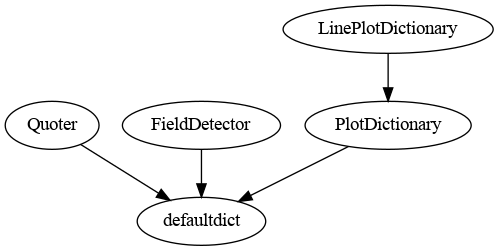

In [2]:
import yt
cgt = ClassGraphTree(defaultdict)
cgt.show_graph()